# Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sdat
import sklearn.cluster as sclust
import sklearn.metrics as smet

Text(0, 0.5, 'x2')

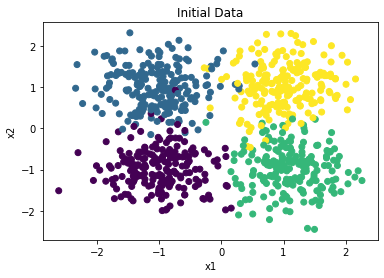

In [2]:
x, y = sdat.make_blobs(n_samples=800, centers=[[-1, -1], [-1, 1], [1, -1], [1, 1]], cluster_std=.5, random_state=42)

_ = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('Initial Data')
plt.xlabel('x1')
plt.ylabel('x2')

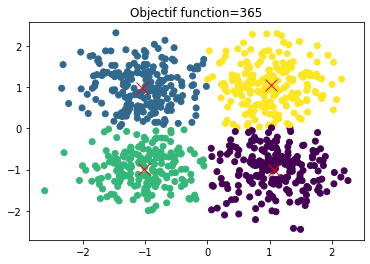

In [16]:
#Question1
c=4
res=sclust.KMeans(n_clusters=c).fit(x)

plt.scatter(x[:,0],x[:,1], c=res.labels_)
plt.plot(res.cluster_centers_[:,0],res.cluster_centers_[:,1],'xr', markersize=12)
plt.title("Objectif function="+str(int(res.inertia_))); #inertia est l'objective function

In [23]:
res.inertia_

365.4432386972412

In [8]:
#Question 2 KMEANS
#res_k est le tableau des resultantes des kmeans
c_range=range(2,10)

res_k=[sclust.KMeans(n_clusters=k,n_init=5).fit(x) for k in c_range]
meas_sil_k=[smet.silhouette_score(x,resk.labels_) for resk in res_k]

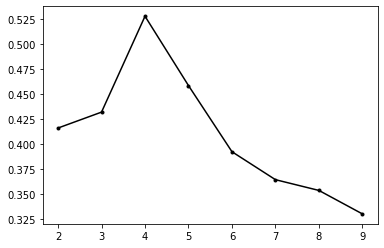

In [13]:
#plot the result
plt.plot(c_range,meas_sil_k, '.-k')

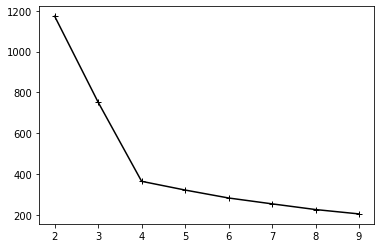

In [22]:
J_k=[resk.inertia_ for resk in res_k]
plt.plot(c_range,J_k,'+-k')

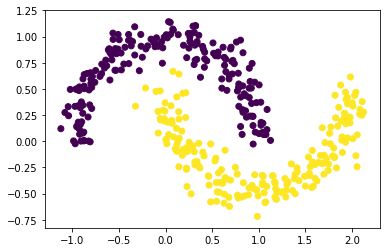

In [27]:
#Question4
x,y=sdat.make_moons(n_samples=400,noise=0.1)
plt.scatter(x[:,0],x[:,1],c=y);

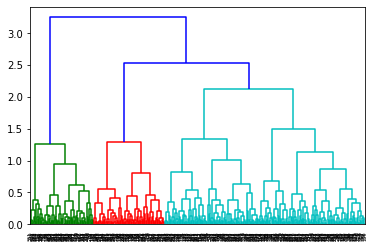

In [59]:
c=2
#on definit resKM, silKM,silDB 
resKM=sclust.KMeans(n_clusters=c).fit(x)
silKM=smet.silhouette_score(x,resKM.labels_)
silDB=smet.silhouette_score(x,resDB.labels_)

from scipy.cluster import hierarchy
linkageName='complete'   #we can change complete by single
dendroCL=hierarchy.linkage(x,linkageName)
resCL=hierarchy.fcluster(dendroCL,criterion='maxclust',t=2) #donne les partitions
silCL=smet.silhouette_score(x,resCL)
hierarchy.dendrogram(dendroCL); #afficher le dendrogram but it doen't give us the clusters

In [56]:
resDB=sclust.DBSCAN(eps=0.2, min_samples=15).fit(x)

NameError: name 'silDB' is not defined

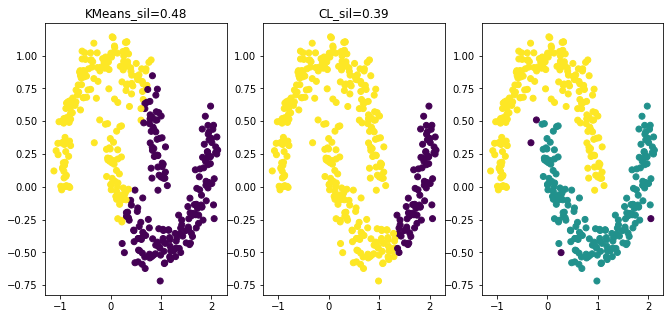

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1) #1st fig, 1 line,
plt.scatter(x[:,0],x[:,1],c=resKM.labels_)
plt.title('KMeans_sil='+str(np.round(silKM,2)))

plt.subplot(1,4,2) #1st fig, 2 line,
plt.scatter(x[:,0],x[:,1],c=resCL)
plt.title('CL_sil='+str(np.round(silCL,2)))

plt.subplot(1,4,3) #1st fig, 1 line,
plt.scatter(x[:,0],x[:,1],c=resDB.labels_)
plt.title('DBSCAN_sil='+str(np.round(silDB,2)))

plt.subplot(1,4,4)
hierarchy.dendrogram(dendroCL);

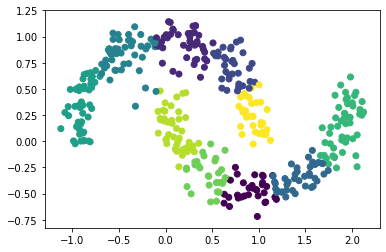

In [62]:
bandwidth=sclust.estimate_bandwidth(x,quantile=0.1)
resMS=sclust.MeanShift(bandwidth=bandwidth).fit(x)

plt.scatter(x[:,0],x[:,1],c=resMS.labels_);

In [69]:
resSP=sclust.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=25)

plt.scatter(x[:,0],x[:,1],c=resSP.labels_);

AttributeError: 'SpectralClustering' object has no attribute 'labels_'